<a href="https://colab.research.google.com/github/spaxxomatic/chatbot/blob/main/Stock_Price_Analysis_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the required packages

In [ ]:
import pandas as pd
import yfinance as yf
import datetime

import pmdarima as pm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Select asset and time period

In [ ]:
start_training = datetime.date(2010, 1, 1)
end_training = datetime.date(2020, 12, 31)
start_testing = datetime.date(2021, 1, 1)
end_testing = datetime.datetime.today()
ticker = "RELIANCE.NS"

## Download training data

In [ ]:
df_training = yf.download(ticker, start=start_training, end=end_training, progress=False)
print(f"Downloaded {df_training.shape[0]} rows and {df_training.shape[1]} columns of {ticker} data")

Downloaded 2712 rows and 6 columns of RELIANCE.NS data


In [ ]:
df_training.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,1930.000000,1951.449951,1920.650024,1943.849976,1937.616821,8999898
2020-12-24,1947.000000,1998.800049,1945.900024,1994.150024,1987.755615,9588577
2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,1996.876221,7947719
2020-12-29,2009.000000,2012.300049,1982.550049,1990.050049,1983.668701,8589407
2020-12-30,1995.250000,2007.199951,1975.550049,1995.500000,1989.101196,10173132


## Convert daily dataset to weekly dataset

In [ ]:
## Resampling to obtain weekly stock prices with the following rules
## 'Open': first opening price of the month
## 'High': max price of the month
## 'Low': min price of the month of the month
## 'Close' : closing price of the month
## 'Adj Close' : adjusted closing price of the month

df_training = df_training.resample('W').agg({'Open':'first', 'High':'max', 'Low': 'min', 'Close':'last',
                                             'Adj Close':'last'})

In [ ]:
df_training.drop(columns=["Open", "High", "Low", "Close"], inplace=True)
df_training.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df_training.tail())

              adj_close
Date                   
2020-12-06  1940.507568
2020-12-13  1999.368286
2020-12-20  1985.163940
2020-12-27  1987.755615
2021-01-03  1989.101196


In [ ]:
start_training_str = (start_training + pd.Timedelta("5 days")).strftime("%B %Y")
end_training_str = (end_training - pd.Timedelta("5 days")).strftime("%B %Y")

<AxesSubplot:title={'center':'RELIANCE.NS weekly adjusted close prices (January 2010 - December 2020)'}, xlabel='Date'>

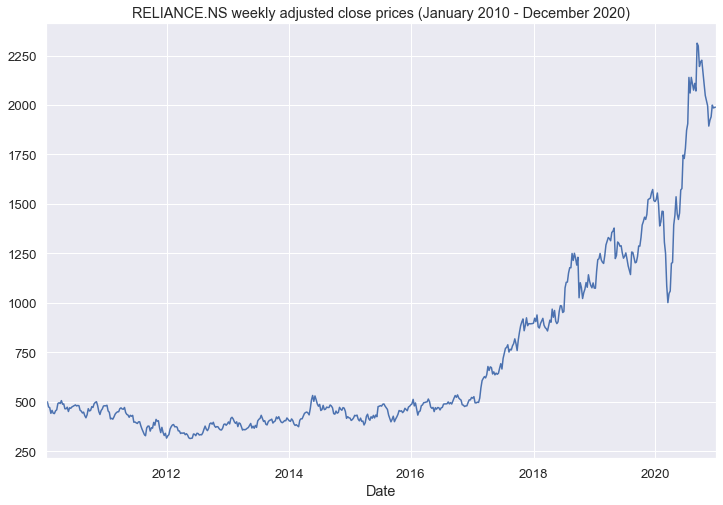

In [ ]:
sns.set(font_scale=1.2)
df_training['adj_close'].plot(figsize=(12, 8),
                     title=f"{ticker} weekly adjusted close prices ({start_training_str} - {end_training_str})")

## Model Selection

In [ ]:
## Fitting the model(With more tuning of the parameters)
arima_fit = pm.auto_arima(df_training['adj_close'], error_action='ignore', suppress_warnings=True, stepwise=False,
                           approximation=False, seasonal=False)

## Printing a summary of the model
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  574
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2834.432
Date:                Sun, 10 Apr 2022   AIC                           5682.864
Time:                        11:56:37   BIC                           5713.321
Sample:                             0   HQIC                          5694.745
                                - 574                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0880      4.572      1.550      0.121      -1.873      16.049
ar.L1         -1.2645      0.062    -20.456      0.000      -1.386      -1.143
ar.L2         -0.5716      0.077     -7.431      0.000      -0.722      -0.421
ar.L3          0.1416      0.029      4.946      0.000       0.085       0.198
ma.L1          1.2852      0.060     21.505      0.000       1.168       1.402
ma.L2          0.7335      0.066     11.054      0.000       0.603       0.864
sigma2      1158.9546     32.019     36.196      0.000    1096.198    1221.711
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2779.24
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              14.89   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Testing data

In [ ]:
df_testing = yf.download(ticker, start=start_testing, end=end_testing, progress=False)
print(f"Downloaded {df_testing.shape[0]} rows and {df_testing.shape[1]} columns of {ticker} data")

Downloaded 315 rows and 6 columns of RELIANCE.NS data


In [ ]:
## Resampling to obtain weekly stock prices with the following rules
## 'Open': first opening price of the month
## 'High': max price of the month
## 'Low': min price of the month
## 'Close' and 'Adj Close': last closing price of the month

df_testing = df_testing.resample('W').agg({'Open':'first', 'High':'max', 'Low': 'min', 'Close':'last', 'Adj Close':'last'})

In [ ]:
df_testing.drop(columns=["Open", "High", "Low", "Close"], inplace=True)
df_testing.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df_testing.head())

              adj_close
Date                   
2021-01-03  1981.126831
2021-01-10  1927.499268
2021-01-17  1931.237305
2021-01-24  2043.027832
2021-01-31  1836.043579


## Forecast using testing data

In [ ]:
n_fcast1 = len(df_testing)

In [ ]:
arima_fcast = arima_fit.predict?

In [ ]:
arima_fcast = arima_fit.predict

In [ ]:
arima_fcast = [pd.DataFrame(arima_fcast[0], columns=['prediction']),pd.DataFrame(arima_fcast[1],
                                                                                   columns=['lower_95', 'upper_95'])]

arima_fcast = pd.concat(arima_fcast, axis=1).set_index(df_testing.index)

In [ ]:
arima_fcast.head()

,prediction,lower_95,upper_95
Date,,,
2021-01-03,1978.568802,1911.844922,2045.292682
2021-01-10,1991.120761,1895.779326,2086.462197
2021-01-17,1988.547742,1865.893075,2111.202408
2021-01-24,1990.223314,1846.785716,2133.660911
2021-01-31,1998.440555,1837.532013,2159.349097


## Plot the results

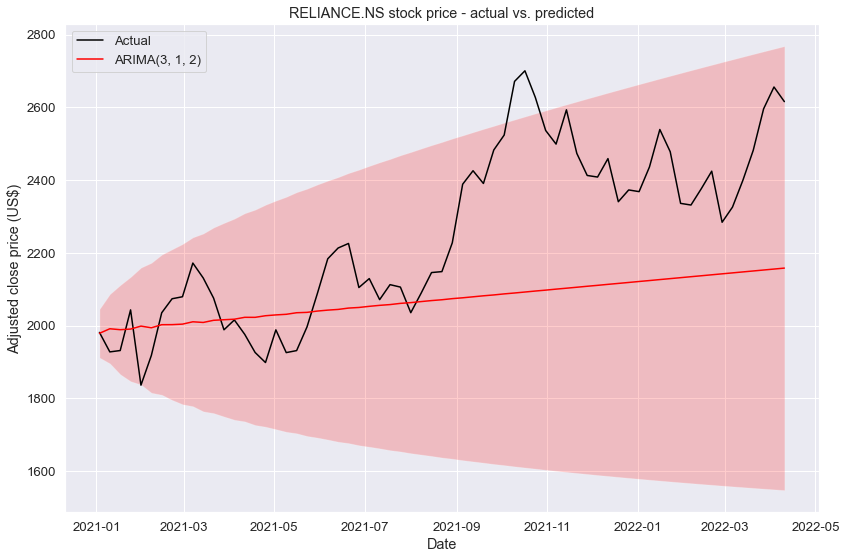

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax = sns.lineplot(data=df_testing['adj_close'], color='black', label='Actual')

ax.plot(arima_fcast.prediction, color='red', label='ARIMA(3, 1, 2)')

ax.fill_between(arima_fcast.index, arima_fcast.lower_95,
                arima_fcast.upper_95, alpha=0.2,
                facecolor='red')

ax.set(title=f"{ticker} stock price - actual vs. predicted", xlabel='Date',
       ylabel='Adjusted close price (US$)')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()